(39308, 16, 16, 1)
Number of ball images: 19654


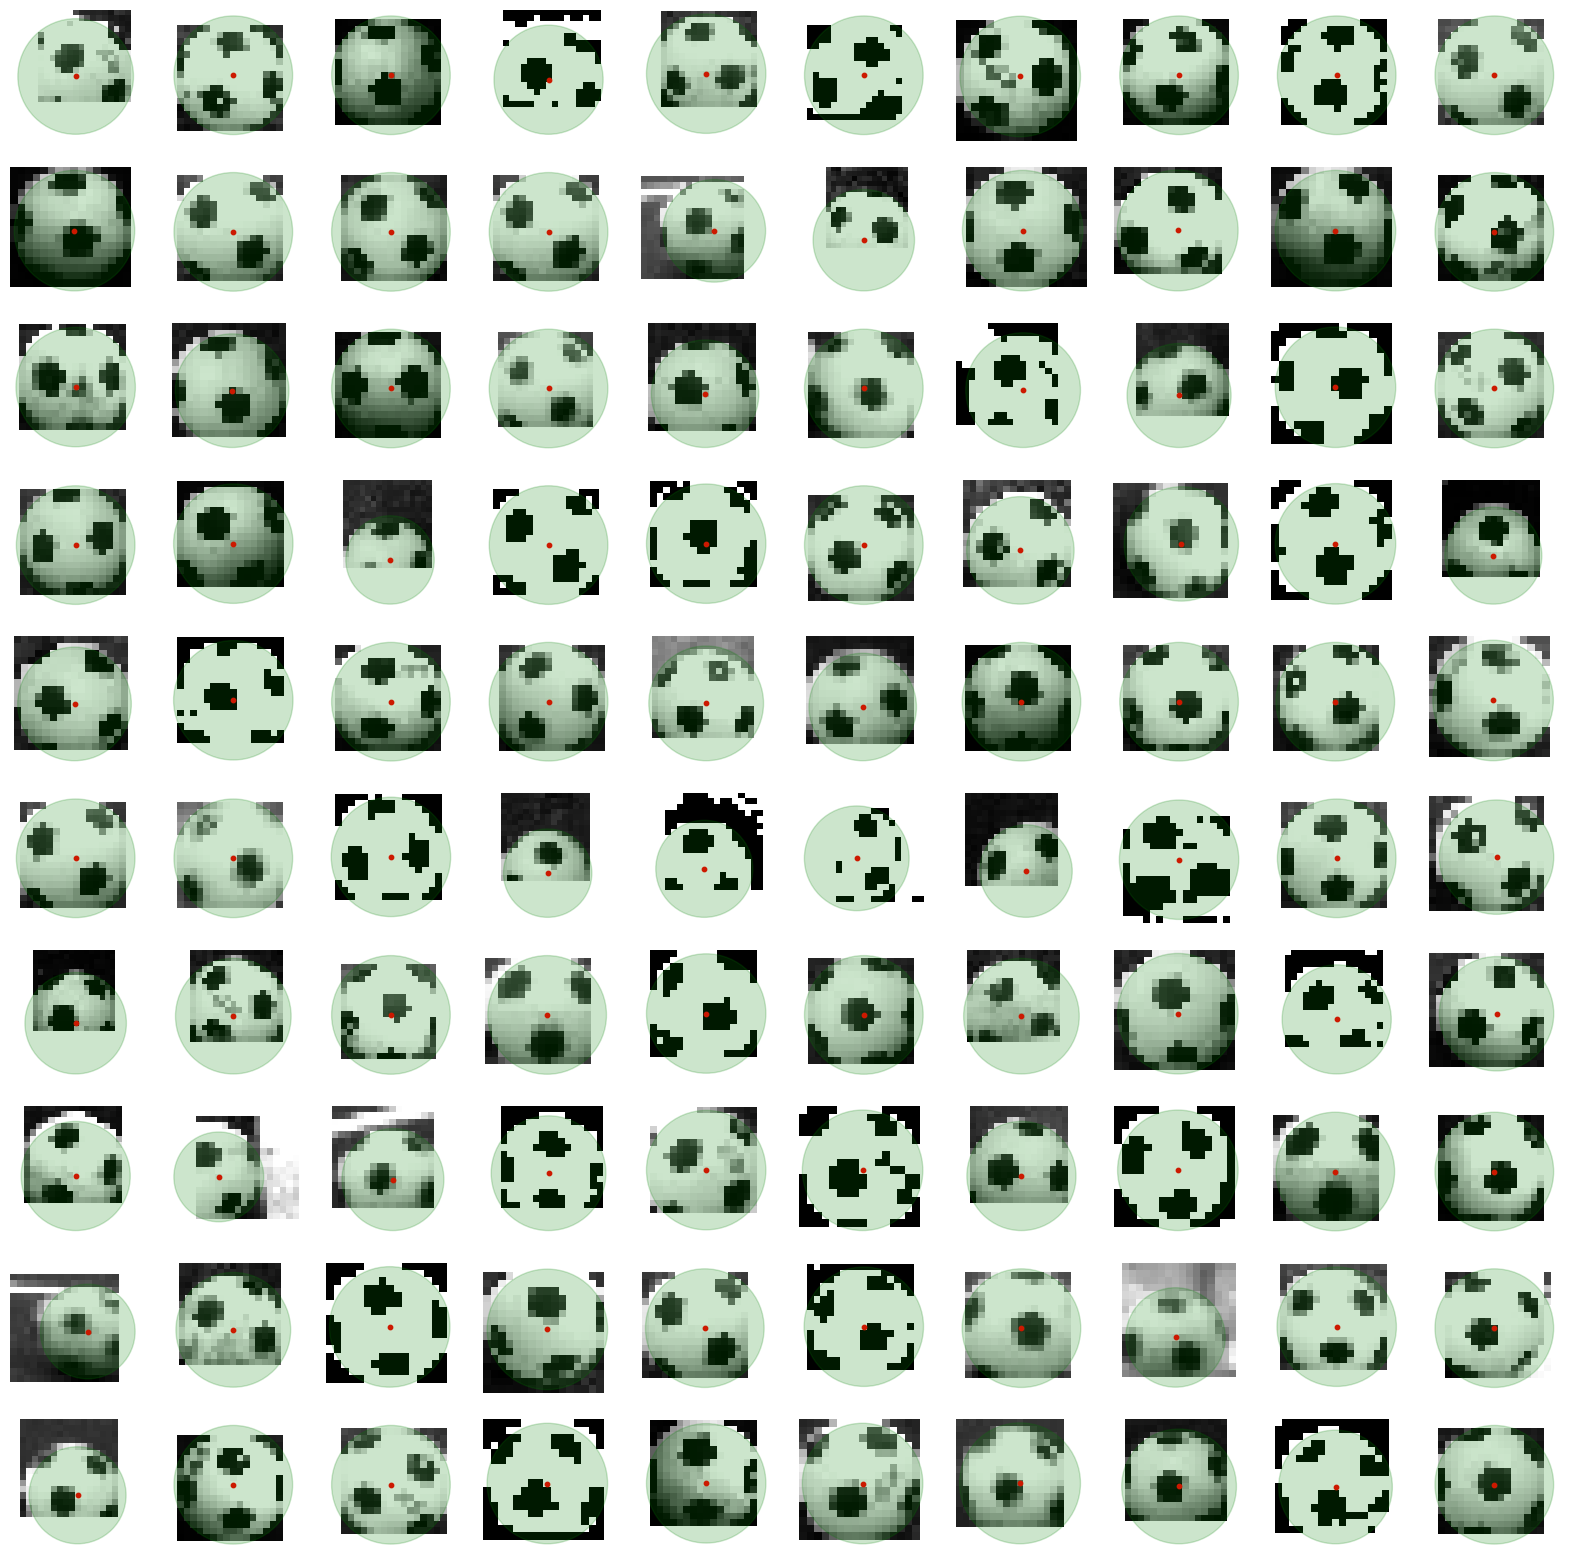

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from patch_detection.datasets import load_ds_ball_detection_center_radius

_, images, y, _ = load_ds_ball_detection_center_radius()

print(images.shape)

images_and_targets = list(zip(images, y))

ball_images_and_targets = [(image, label) for image, label in images_and_targets if label[3] == 1]
print(f"Number of ball images: {len(ball_images_and_targets)}")


# # plot 100 balls with radius and center

fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(10):
    for j in range(10):
        ball_image, target = ball_images_and_targets[i * 10 + j]

        ax[i][j].imshow(ball_image, cmap="gray")

        radius, x, y, is_ball = target

        # scale x, y. radius to image size
        x = x * ball_image.shape[1]
        y = y * ball_image.shape[0]
        radius = radius * ball_image.shape[1]

        # draw x, y as ball center into the images with radius
        ax[i][j].scatter(x, y, c="r", s=10)
        ax[i][j].add_patch(plt.Circle((x, y), radius, color="g", fill=True, alpha=0.2))

        ax[i][j].axis("off")

In [ ]:
import keras
from sklearn.model_selection import train_test_split


def make_naoth_detector():
    """ """
    input_shape = (16, 16, 1)
    model = keras.models.Sequential()

    model.add(keras.layers.Convolution2D(16, (3, 3), input_shape=input_shape, padding="same", name="Conv2D_1"))
    model.add(keras.layers.ReLU(name="activation_1"))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), name="pooling_1"))

    model.add(keras.layers.Convolution2D(16, (3, 3), padding="same", name="Conv2D_2"))
    model.add(keras.layers.ReLU(name="activation_2"))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), name="pooling_2"))

    model.add(keras.layers.Convolution2D(32, (3, 3), padding="same", name="Conv2D_3"))
    model.add(keras.layers.ReLU(name="activation_3"))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), name="pooling_3"))

    model.add(keras.layers.Flatten(name="flatten_1"))
    model.add(keras.layers.Dense(32, activation="relu", name="dense_1"))
    model.add(keras.layers.Dense(64, activation="relu", name="dense_2"))
    model.add(keras.layers.Dense(16, activation="relu", name="dense_3"))
    model.add(keras.layers.Dense(3, activation="sigmoid", name="dense_4"))

    model.compile(
        optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0005),
        loss=keras.losses.MeanSquaredError(),
        metrics=[keras.metrics.RootMeanSquaredError()],
    )

    return model


detector = make_naoth_detector()

# split data into train and test

X = np.array([image for image, _ in ball_images_and_targets])
y = np.array([label for _, label in ball_images_and_targets])

y = y[:, :3]  # only use radius, center_x, center_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.75, patience=10),
]

# train the model
history = detector.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=200,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=callbacks,
)

In [ ]:
# plot model predicitons on validation data
y_pred = detector.predict(X_test)

fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(10):
    for j in range(10):
        ball_image = X_test[i * 10 + j]
        target = y_test[i * 10 + j]

        ax[i][j].imshow(ball_image, cmap="gray")

        radius, x, y = target

        # scale x, y. radius to image size
        x = x * ball_image.shape[1]
        y = y * ball_image.shape[0]
        radius = radius * ball_image.shape[1]

        # draw x, y as ball center into the images with radius
        ax[i][j].scatter(x, y, c="r", s=10)
        ax[i][j].add_patch(plt.Circle((x, y), radius, color="g", fill=True, alpha=0.2))

        ax[i][j].axis("off")

In [2]:
from patch_detection.datasets import (
    load_ds_ball_detection_center_radius,
    load_ds_patches_21_23,
    load_ds_patches_classification_ball_no_ball,
    load_ds_patches_classification_ball_no_ball_top_bottom,
)

ds_ball_detection = load_ds_ball_detection_center_radius()
ds_patches = load_ds_patches_21_23()
ds_classification = load_ds_patches_classification_ball_no_ball()
ds_classification_top_bottom = load_ds_patches_classification_ball_no_ball_top_bottom()

In [19]:
XT, yt, XB, yb = ds_classification_top_bottom


print(XT.shape, sum(yt))
print(XB.shape, sum(yb))

(555108, 16, 16, 1) 9947.0
(185121, 16, 16, 1) 13412.0
